In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [89]:
with open('python/methods.py', 'r') as file:
    exec(file.read())

with open('python/methods_for_r.py', 'r') as file:
    exec(file.read())

In [107]:
samples = pd.read_csv('sample_sheet.csv')
samples = samples[ samples['Region'] == 'S1_L23' ]
samples

,SID,AnimalID,CellName,Region,Date,Depth,Count,Location
0,W1_C1,W1,C1,S1_L23,2019 12 09,177.265396,180,W1/C1
1,W1_C2,W1,C2,S1_L23,2019 12 09,265.898093,270,W1/C2
2,W1_C8,W1,C8,S1_L23,2019 12 10,315.138481,320,W1/C8
3,W2_C3,W2,C3,S1_L23,2019 12 12,236.353861,240,W2/C3
4,W2_C4,W2,C4,S1_L23,2019 12 12,285.594248,290,W2/C4
5,W2_C5,W2,C5,S1_L23,2019 12 12,408.695218,415,W2/C5
6,W2_C6,W2,C6,S1_L23,2019 12 12,196.961551,200,W2/C6
7,W3_C10,W3,C10,S1_L23,2019 12 18,364.378869,370,W3/C10
8,W3_C11,W3,C11,S1_L23,2019 12 18,226.505783,230,W3/C11
9,W4_C10,W4,C10,S1_L23,2019 12 18,206.809628,210,W4/C10


In [132]:
before_data = read_event_data(sample_ids = samples['SID'], time_shift = -0.5, event_length = 0.25)
time = np.array(range(0, int(0.75 * 20_000) + 1, 1)) / 20_000
sfreq = 20_000 # Hz

Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short


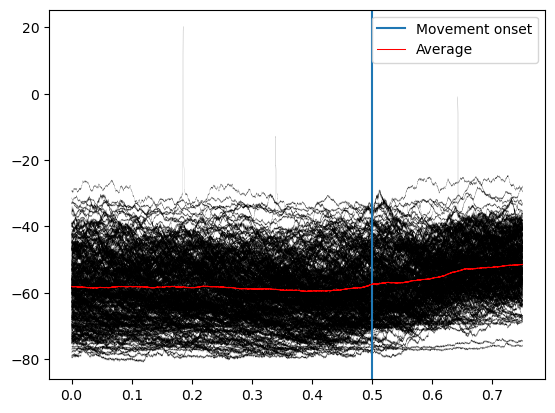

In [133]:
for i in before_data:
    plt.plot(time, i, linewidth = 0.05, color = 'black')

plt.axvline(x = 0.5, label = 'Movement onset')
plt.plot(time, np.mean(before_data, axis = 0), linewidth = 0.75, color = 'red', label = 'Average')
plt.legend(loc = 'upper right')
plt.show()

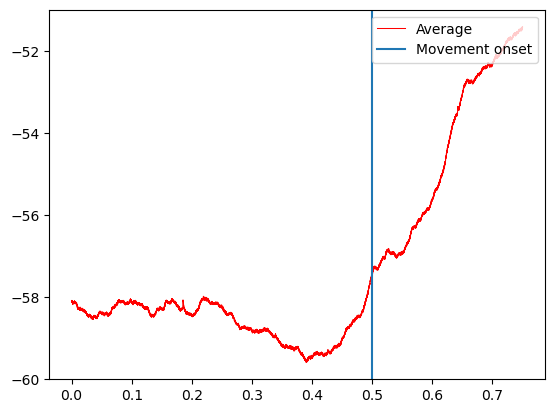

In [135]:
averages = np.mean(before_data, axis = 0)
plt.plot(time, averages, linewidth = 0.75, color = 'red', label = 'Average')
plt.axvline(x = 0.5, label = 'Movement onset')
plt.legend(loc = 'upper right')
plt.show()

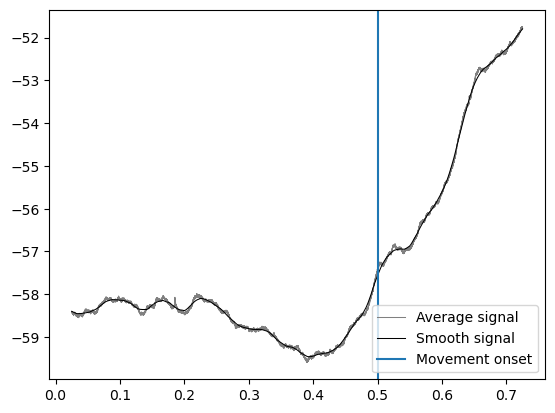

In [136]:
average = np.mean(before_data, axis = 0)
window_size = 500
smooth = np.convolve(average, np.ones(window_size) / window_size, mode = 'same')[ window_size:-window_size ]

plt.plot(time[window_size:-window_size], average[ window_size:-window_size ], linewidth = 0.75, color = 'gray', label = 'Average signal')
plt.plot(time[window_size:-window_size], smooth, linewidth = 0.75, color = 'black', label = 'Smooth signal')
plt.axvline(x = 0.5, label = 'Movement onset')
plt.legend(loc = 'lower right')
plt.show()

In [137]:
time[window_size:-window_size][np.argmin(smooth)] # seconds before the event

0.3932

In [138]:
after_data = read_event_data(sample_ids = samples['SID'], time_shift = 0.5, event_length = 0.25)
time = np.array(range(0, int(0.75 * 20_000) + 1, 1)) / 20_000
sfreq = 20_000 # Hz

Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short
Too short


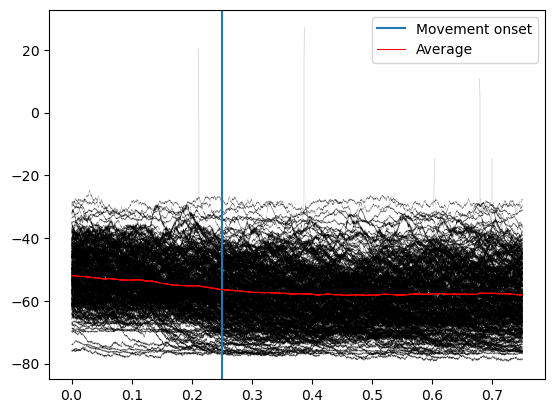

In [139]:
for i in after_data:
    plt.plot(time, i, linewidth = 0.05, color = 'black')

plt.axvline(x = 0.25, label = 'Movement onset')
plt.plot(time, np.mean(after_data, axis = 0), linewidth = 0.75, color = 'red', label = 'Average')
plt.legend(loc = 'upper right')
plt.show()

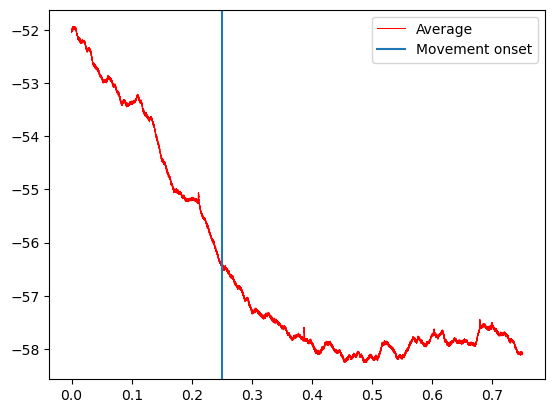

In [140]:
averages = np.mean(after_data, axis = 0)
plt.plot(time, averages, linewidth = 0.75, color = 'red', label = 'Average')
plt.axvline(x = 0.25, label = 'Movement onset')
plt.legend(loc = 'upper right')
plt.show()

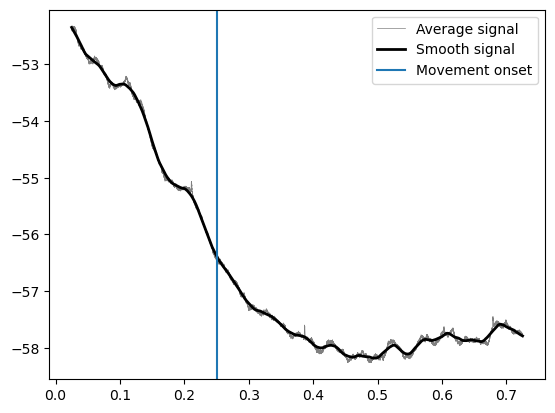

In [141]:
average = np.mean(after_data, axis = 0)
window_size = 500
smooth = np.convolve(average, np.ones(window_size) / window_size, mode = 'same')[ window_size:-window_size ]

plt.plot(time[window_size:-window_size], average[ window_size:-window_size ], linewidth = 0.5, color = 'gray', label = 'Average signal')
plt.plot(time[window_size:-window_size], smooth, linewidth = 2, color = 'black', label = 'Smooth signal')
plt.axvline(x = 0.25, label = 'Movement onset')
plt.legend(loc = 'upper right')
plt.show()